In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd -q ..

In [3]:
import lcpfn 
import numpy as np
from matplotlib import pyplot as plt

## Generate samples from LC prior

(0.0, 1.0)

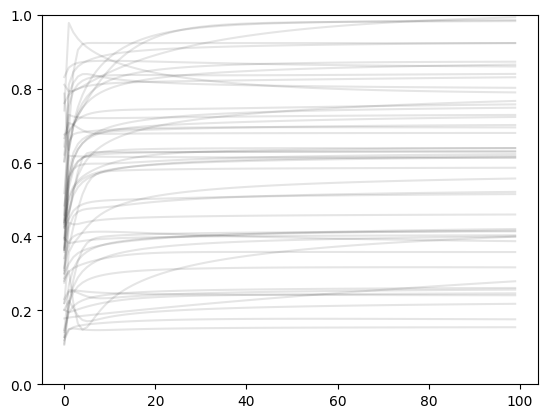

In [4]:
for _ in range(50):
    prior = lcpfn.sample_from_prior(np.random)
    curve, _ = prior()
    plt.plot(curve, "black", alpha=0.1)
plt.ylim(0, 1)

## Train a PFN model with the previous learning curve prior

In [5]:
get_batch_func = lcpfn.create_get_batch_func(prior=lcpfn.sample_from_prior)

In [6]:
# example of a batch

X, Y, Y_noisy = get_batch_func(batch_size=100, seq_len=100, num_features=1)
print(X.shape, Y.shape, Y_noisy.shape)

torch.Size([100, 100, 1]) torch.Size([100, 100]) torch.Size([100, 100])


In [7]:
# Main function to train a PFN model

lcpfn.train_lcpfn

<function lcpfn.train_lcpfn.train_lcpfn(get_batch_func, seq_len: int = 100, emsize: int = 512, nlayers: int = 12, num_borders: int = 1000, lr: float = 0.001, batch_size: int = 100, epochs: int = 1000)>

In [9]:
# train a small model for 3 epochs

result = lcpfn.train_lcpfn(get_batch_func=get_batch_func, 
                          seq_len=100,
                         emsize=256,
                         nlayers=3,
                         num_borders=1000,
                         lr=0.001,
                         batch_size=10,
                         epochs=3)

Using 1000000 y evals to estimate 1000 buckets. Cut off the last 0 ys.
Using cpu:0 device
init dist
Not using distributed
DataLoader.__dict__ {'num_steps': 100, 'get_batch_kwargs': {'batch_size': 10, 'eval_pos_seq_len_sampler': <function train.<locals>.eval_pos_seq_len_sampler at 0x000001FBADE8BC10>, 'seq_len_maximum': 100, 'device': 'cpu:0', 'num_features': 1, 'hyperparameters': {}}, 'num_features': 1}
Style definition: None
Using a Transformer with 2.23 M parameters
-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 14.63s | mean loss -0.58 | pos losses   nan,  nan,  nan,-0.13,-0.44,-0.55,-0.59, 0.20,-0.51,-0.32,  nan,-0.48,  nan,-0.33,-0.60,-0.11,-0.49,-0.53,  nan,  nan,  nan,  nan,-0.82,-0.56,  nan,-0.80,  nan,  nan,-0.69,-0.52, 0.44,-0.18,-0.62,-0.26,  nan,  nan,-0.17,-0.38,-0.48,-0.67,-0.64,-0.75,-0.69,-0.89,-0.35,  nan,  nan,  nan,-0.02,  nan,  nan,  nan,-0.88,-0.99,-1.05,-0.86,-0.76,-0.84,-0.40,-0.95,-0.44,  nan,

In [10]:
# Get the trained model

model = result[2]
print(model)

TransformerModel(
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
        (linear2): Linear(in_features=512, out_features=256, bias=True)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.2, inplace=False)
        (dropout2): Dropout(p=0.2, inplace=False)
      )
      (1): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout): Dro